In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ex. 1

Every computer has a way of producing a random number between 0
and 1. Use this to simulate a simple coin-tossing game where player A
gets a point for heads, player B a point for tails. Guess how often in a
game of N tosses the lead will change; if A is in the lead at toss N,
when was the previous change of lead most likely to be? And by how
much is a player typically in the lead? Try to back up these guesses with
calculations.

**Solution**

After each game the score depend on previous results (it's a sum of result on each step). The mean score of gans and losses is zero, but the scatter is $\sqrt{N}$

Let $x_i$ - a score. It can be plus or minus one. So:
$$Score = \sum_i{x_i}$$

$$\sigma = \sqrt{\sum_i{x_i^2}}$$

That mean that one player can get a long way ahead. It's time simmetry, so at the end can happend one more change

In [47]:
def game_lead(N):
    """
    N - number of games in a batch
    """
    while True:
        change = []
        A = 0
        B = 0
        coins = np.random.choice([0, 1], size = N)
        for i, coin in enumerate(coins):
            if coin == 0:
                A += 1
                if ((A - 1) == B) & (A > B):
                    change.append(i)
            else:
                B += 1
        if A > B:
            break
        else: continue
    return change[-1]

In [58]:
change = []
for i in range(10000):
    change.append(game_lead(101))

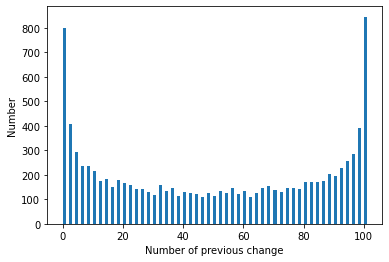

In [59]:
plt.hist(change, bins = np.arange(0, 102, 1))
plt.ylabel('Number')
plt.xlabel('Number of previous change')
plt.show()

# Ex.2